<a href="https://colab.research.google.com/github/Sravankumarannuri26/G7_DS/blob/main/Mini%20Projects/Sravan%20Kumar/bikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Analysis

Season : season (1:winter, 2:spring, 3:summer, 4:fall)

Weather : 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('hours.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8734.000000,8734.000000,8734.0,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,13012.500000,2.489810,1.0,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,42.679757,191.986604,234.666361
std,2521.432959,1.108279,0.0,3.449086,6.921208,0.170275,2.005254,0.465842,0.624470,0.186752,0.166587,0.188184,0.121490,56.970413,175.481637,208.910941
min,8646.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,10829.250000,2.000000,1.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,13012.500000,2.000000,1.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,15195.750000,3.000000,1.0,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8734 non-null   int64  
 1   dteday      8734 non-null   object 
 2   season      8734 non-null   int64  
 3   yr          8734 non-null   int64  
 4   mnth        8734 non-null   int64  
 5   hr          8734 non-null   int64  
 6   holiday     8734 non-null   int64  
 7   weekday     8734 non-null   int64  
 8   workingday  8734 non-null   int64  
 9   weathersit  8734 non-null   int64  
 10  temp        8734 non-null   float64
 11  atemp       8734 non-null   float64
 12  hum         8734 non-null   float64
 13  windspeed   8734 non-null   float64
 14  casual      8734 non-null   int64  
 15  registered  8734 non-null   int64  
 16  cnt         8734 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.1+ MB


In [ ]:
df.apply(lambda x:len(x.unique()))

instant       8734
dteday         366
season           4
yr               1
mnth            12
hr              24
holiday          2
weekday          7
workingday       2
weathersit       4
temp            50
atemp           61
hum             81
windspeed       26
casual         319
registered     772
cnt            866
dtype: int64

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

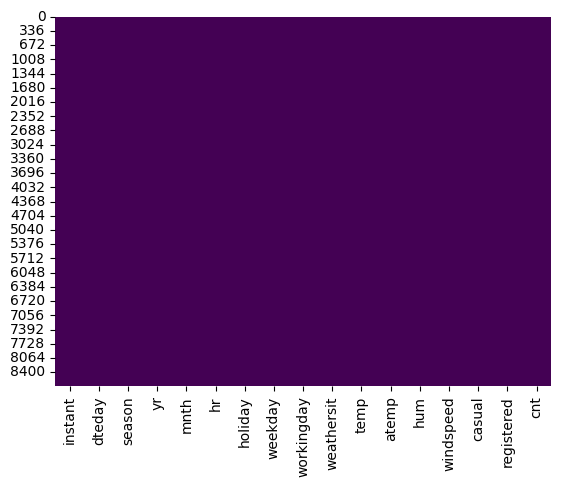

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
df=df.rename(columns={'dteday':'dateday',
                      'weathersit':'weather',
                      'yr':'year',
                      'mnth':'month',
                      'hr':'hour',
                      'hum':'humidity',
                      'cnt':'count'})

In [ ]:
df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8


In [ ]:
df=df.drop(columns=['instant','dateday','year'])

In [ ]:
df

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8734 non-null   int64  
 1   month       8734 non-null   int64  
 2   hour        8734 non-null   int64  
 3   holiday     8734 non-null   int64  
 4   weekday     8734 non-null   int64  
 5   workingday  8734 non-null   int64  
 6   weather     8734 non-null   int64  
 7   temp        8734 non-null   float64
 8   atemp       8734 non-null   float64
 9   humidity    8734 non-null   float64
 10  windspeed   8734 non-null   float64
 11  casual      8734 non-null   int64  
 12  registered  8734 non-null   int64  
 13  count       8734 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 955.4 KB


In [ ]:
columns=['season','month','hour','holiday','weekday','workingday','weather']
for columns in columns:
  df[columns]=df[columns].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8734 non-null   category
 1   month       8734 non-null   category
 2   hour        8734 non-null   category
 3   holiday     8734 non-null   category
 4   weekday     8734 non-null   category
 5   workingday  8734 non-null   category
 6   weather     8734 non-null   category
 7   temp        8734 non-null   float64 
 8   atemp       8734 non-null   float64 
 9   humidity    8734 non-null   float64 
 10  windspeed   8734 non-null   float64 
 11  casual      8734 non-null   int64   
 12  registered  8734 non-null   int64   
 13  count       8734 non-null   int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 539.6 KB


# Exploratory Data Analysis


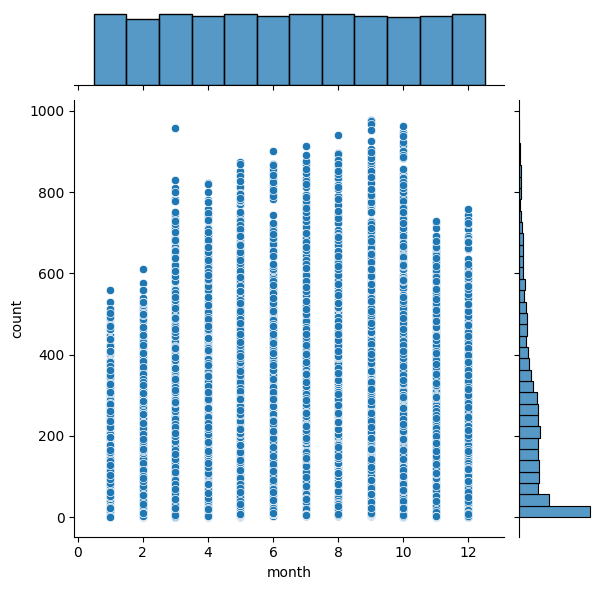

In [ ]:
sns.jointplot(x='month',y='count',data=df)

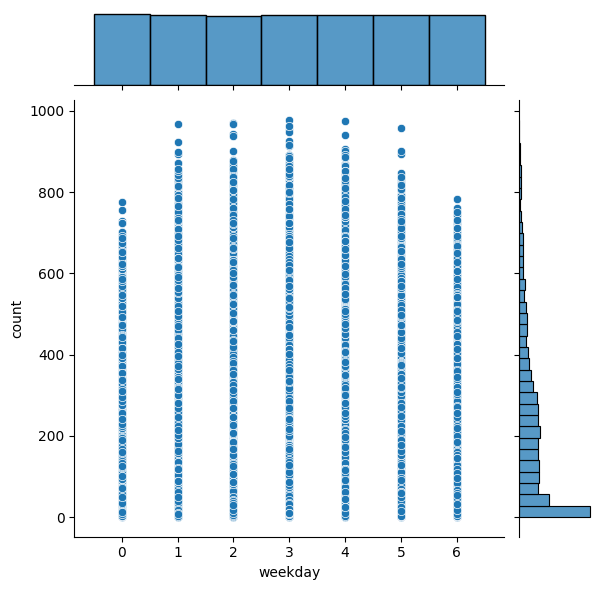

In [ ]:
sns.jointplot(x='weekday',y='count',data=df)

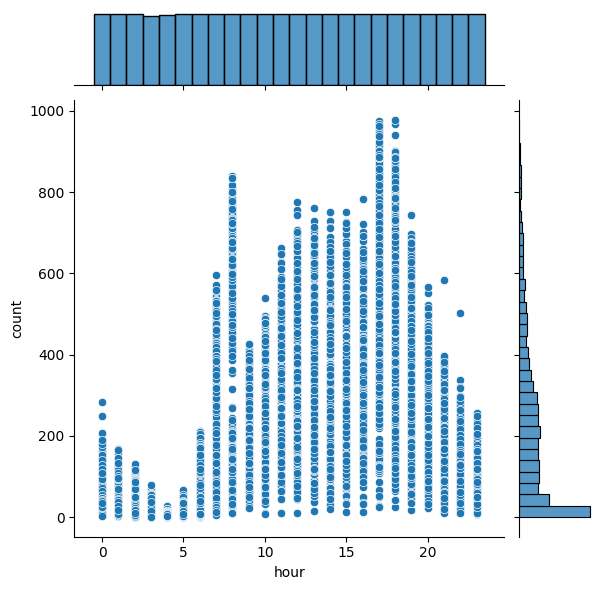

In [ ]:
sns.jointplot(x='hour',y='count',data=df)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

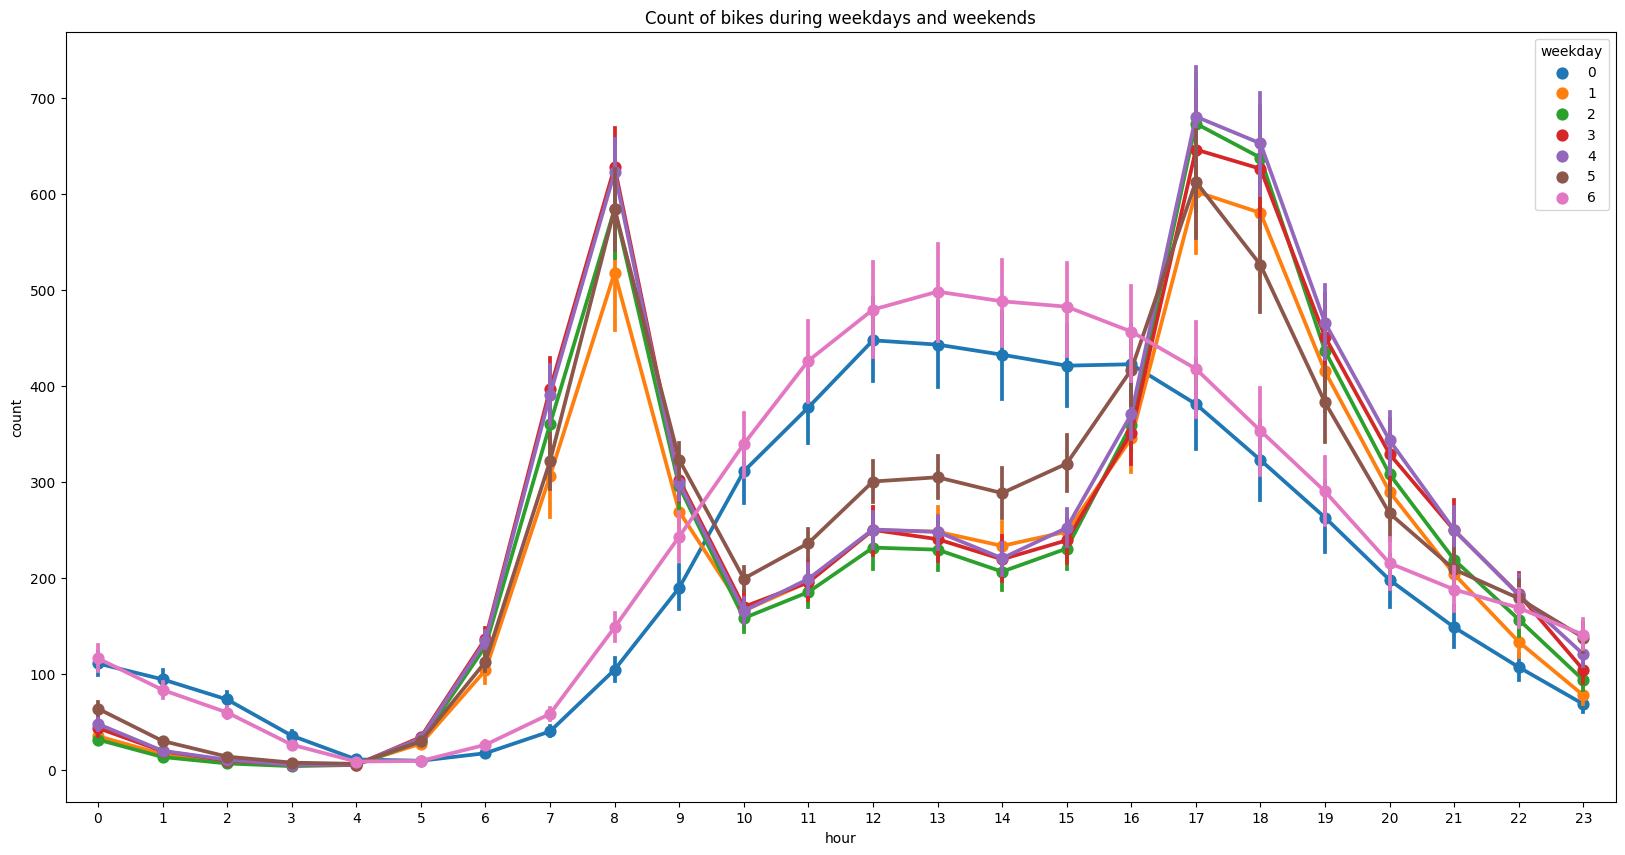

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

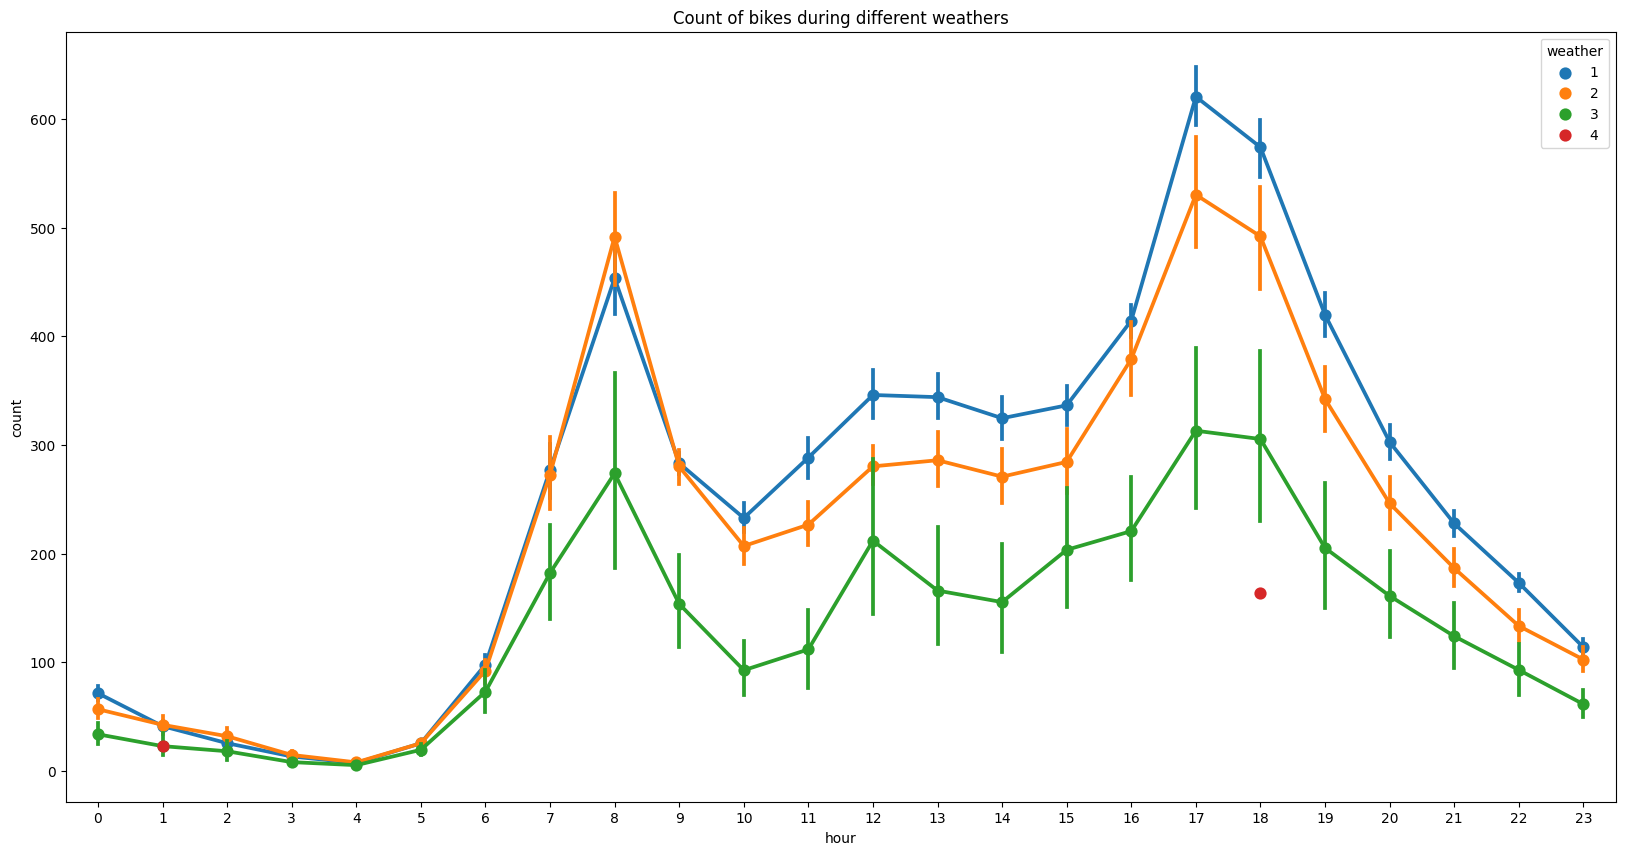

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

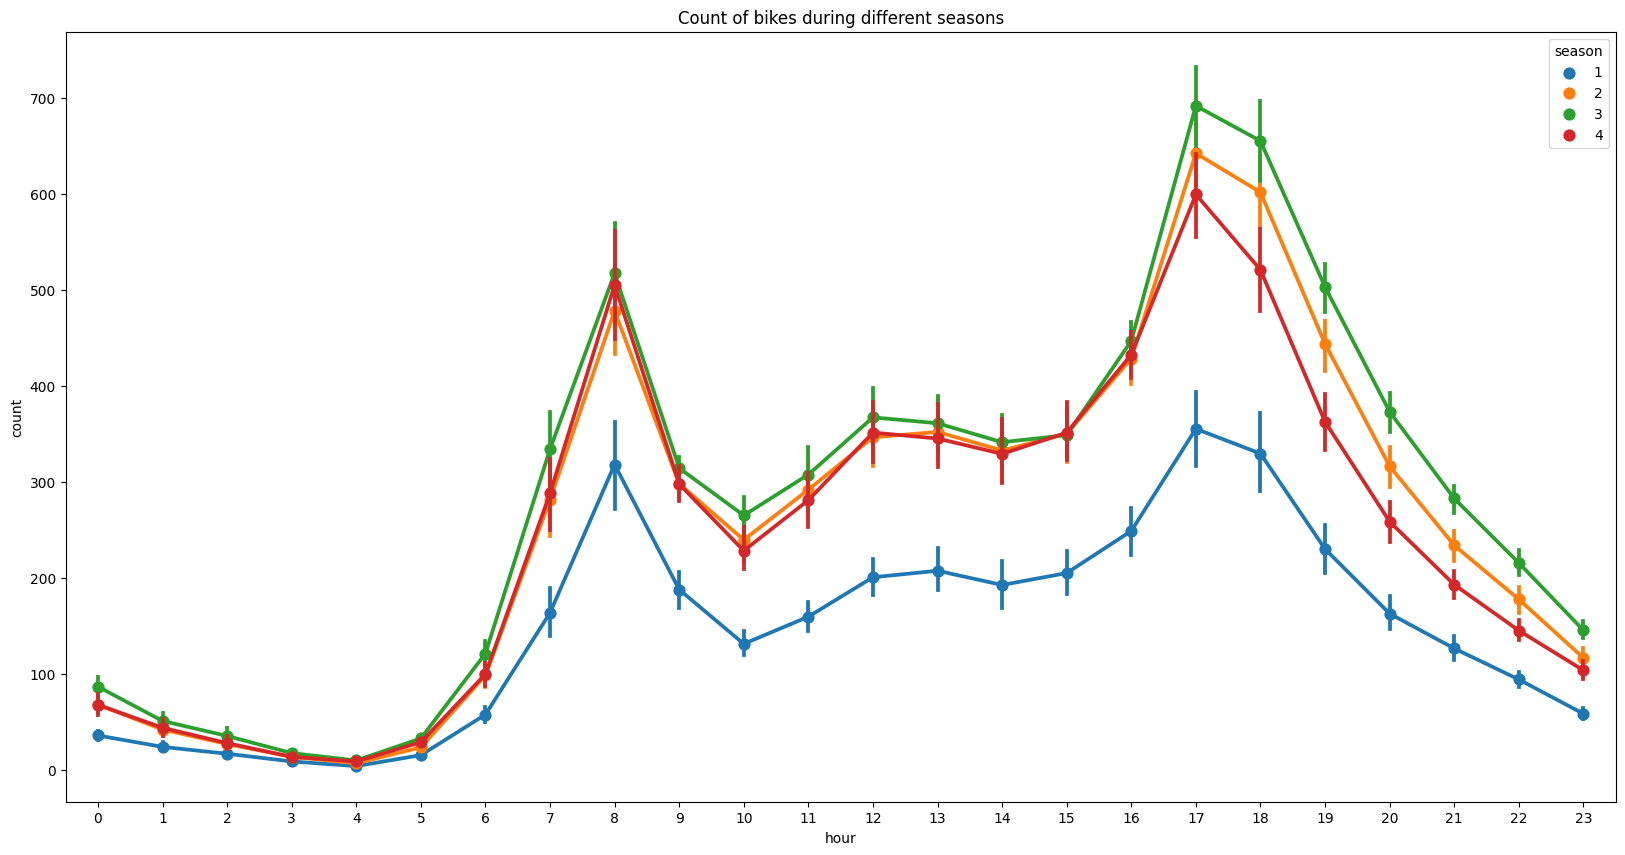

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during different seasons')

<Axes: ylabel='Frequency'>

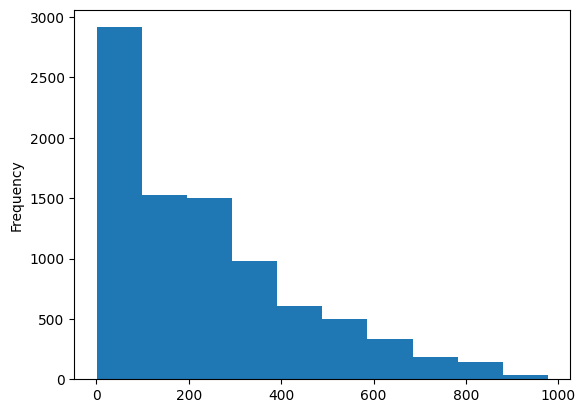

In [ ]:
df['count'].plot.hist()

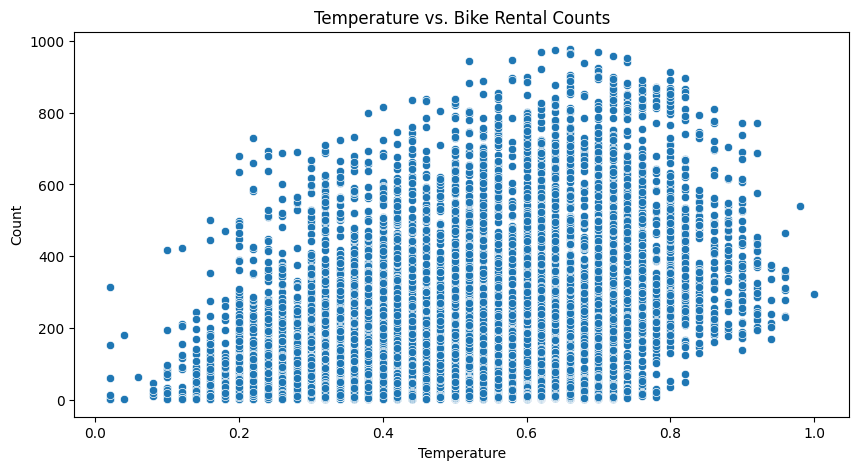

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='temp', y='count')
plt.title('Temperature vs. Bike Rental Counts')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='month', ylabel='count'>

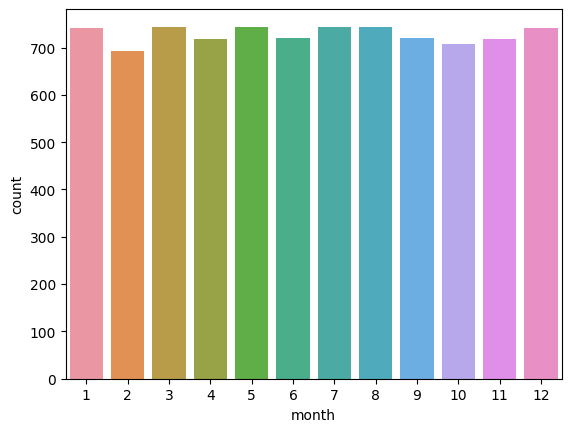

In [ ]:



sns.countplot(x='month',data=df)

<Axes: xlabel='season', ylabel='count'>

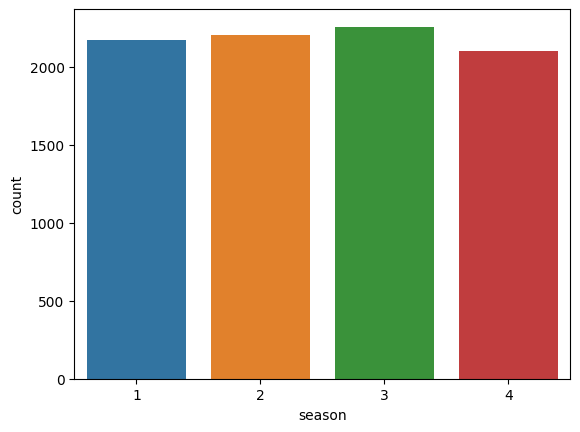

In [ ]:
sns.countplot(x='season',data=df)

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='temp', nbins=30, title='Distribution of Temperature')
fig.update_xaxes(title_text='Temperature')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
fig = px.line(df, x='hour', y='count', title='Hourly Bike Rental Counts')
fig.update_xaxes(title_text='Hour of the Day')
fig.update_yaxes(title_text='Count')
fig.show()

<Axes: xlabel='season', ylabel='count'>

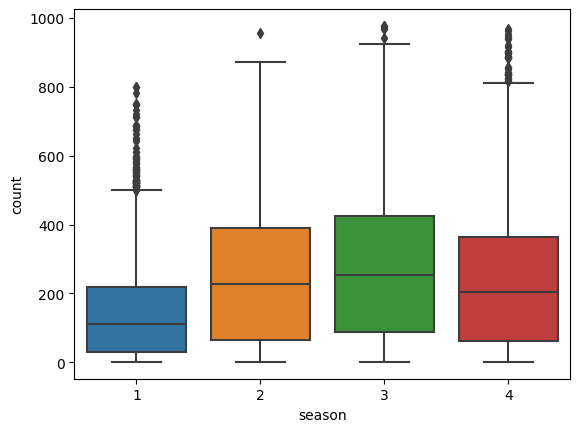

In [ ]:
sns.boxplot(x='season',y='count',data=df)


<Axes: xlabel='weekday', ylabel='count'>

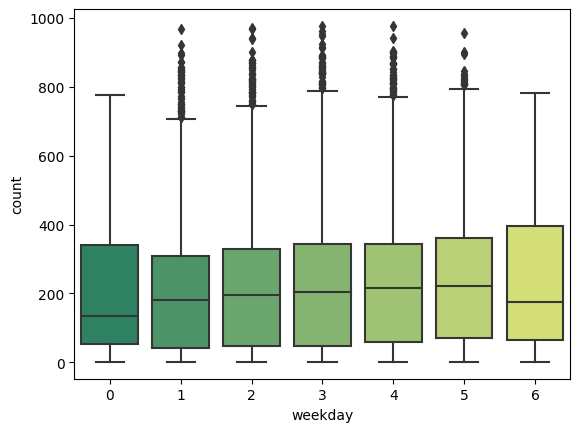

In [ ]:
sns.boxplot(x='weekday',y='count',data=df,palette='summer')

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='temp', nbins=30, title='Distribution of Temperature')
fig.update_xaxes(title_text='Temperature')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
fig = px.box(df, y='count', title='Box Plot of Bike Rental Counts')
fig.update_yaxes(title_text='Bike Rental Counts')
fig.show()

In [ ]:
fig = px.scatter(df, x='temp', y='count', title='Temperature vs. Bike Rental Counts')
fig.update_xaxes(title_text='Temperature')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
fig = px.scatter(df, x='temp', y='count', title='Humidity vs. Bike Rental Counts')
fig.update_xaxes(title_text='Humidity')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
df['count']=np.log(df['count'])

<Axes: >

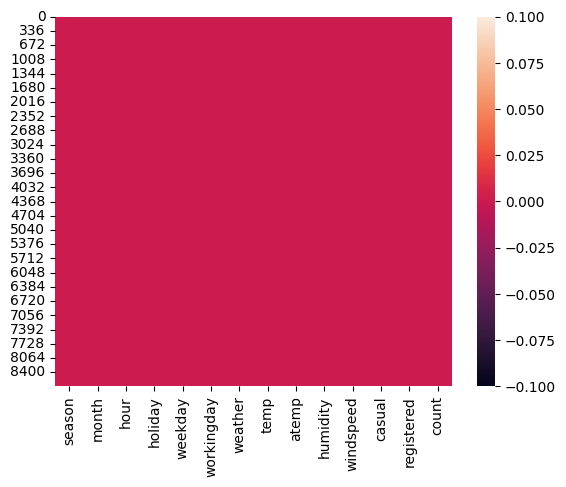

In [ ]:
sns.heatmap(df.isnull())

<ipython-input-115-04b0920042fd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

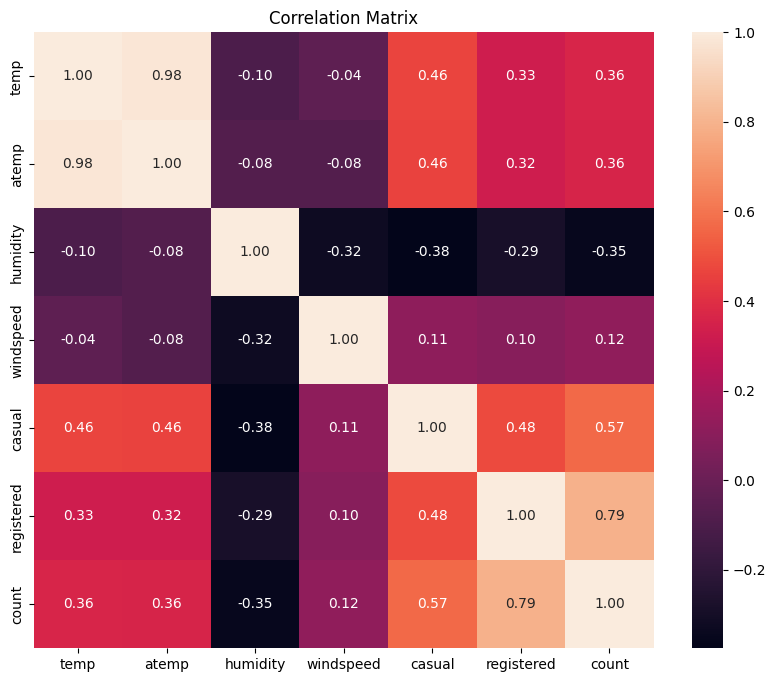

In [ ]:

corr=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title('Correlation Matrix')

In [ ]:


fig = px.imshow(corr,
               x=corr.columns,
               y=corr.columns,
               color_continuous_scale='Viridis',
               title='Correlation Heatmap')

fig.show()

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df

,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,0.36,0.3788,0.66,0.0000,5,43,3.871201,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.36,0.3485,0.66,0.1343,15,78,4.532599,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.32,0.3485,0.76,0.0000,16,59,4.317488,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.30,0.3333,0.81,0.0000,11,41,3.951244,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.28,0.3030,0.81,0.0896,0,8,2.079442,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,0.26,0.2576,0.60,0.1642,11,108,4.779123,1,0,0,...,0,0,0,0,0,1,0,1,0,0
8730,0.26,0.2576,0.60,0.1642,8,81,4.488636,1,0,0,...,0,0,0,0,0,1,0,1,0,0
8731,0.26,0.2576,0.60,0.1642,7,83,4.499810,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8732,0.26,0.2727,0.56,0.1343,13,48,4.110874,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
ss=df.corr()

In [ ]:
X=df.loc[:,df.columns!="count"]
Y=df["count"]

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor

models=[DecisionTreeRegressor(),
        RandomForestRegressor(),
        ExtraTreesRegressor(),
        GradientBoostingRegressor()]

In [ ]:
from sklearn import model_selection
def train(model):
  kfold=model_selection.KFold(n_splits=5,random_state=None)
  pred=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='neg_mean_squared_error')
  cv_score=pred.mean()
  print("Model:",model)
  print("CV score:",abs(cv_score))

In [ ]:
for model in models:
  train(model)

Model: DecisionTreeRegressor()
CV score: 0.001004854411127255
Model: RandomForestRegressor()
CV score: 0.0005666511111721434
Model: ExtraTreesRegressor()
CV score: 0.0007145185486211474
Model: GradientBoostingRegressor()
CV score: 0.0010617894729972048


In [ ]:
from sklearn import tree
Decision=tree.DecisionTreeRegressor(max_depth=7)
Decision.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7)

In [ ]:
Y_test_pred=Decision.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_test_pred)

0.9980891558779512

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.027066842078502937

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data = export_graphviz(Decision, out_file=None, filled=True,feature_names=x_train.columns)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render("decision_tree")
graph.view("decision_tree")